## 1. Data Loading

In [1]:
!pip install cufflinks

In [2]:
from CryptoCompareAPI import CryptoCompareAPI
from utils import COIN_LIST, myconcat
import cufflinks as cf
import pandas as pd
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Get trading data from CryptoCompareAPI
api = CryptoCompareAPI()

param_list = []
for coin in COIN_LIST:
    param_list.append(
        {'fsym':coin, 'tsym':'USD', 'limit':60*24}
    )

df_list = []
for param in param_list:
    df = api.getCandle('m', param)
    df_list.append(df)

df = myconcat(df_list, ['time', 'close'])
df.columns = ['time'] + COIN_LIST
df.time = pd.to_datetime(df.time, unit='s')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 8 columns):
time    1441 non-null datetime64[ns]
USDT    1441 non-null float64
DAI     1441 non-null float64
TUSD    1441 non-null float64
GUSD    1441 non-null float64
USDC    1441 non-null float64
PAX     1441 non-null float64
USDS    1441 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.1 KB


In [5]:
df.set_index('time', inplace=True)

In [6]:
df.head()

,USDT,DAI,TUSD,GUSD,USDC,PAX,USDS
time,,,,,,,
2019-07-04 22:44:00,1.003,0.9881,0.998,0.9861,1.001,0.998,0.9920
2019-07-04 22:45:00,1.003,0.9881,0.998,0.9859,1.001,0.998,0.9918
2019-07-04 22:46:00,1.003,0.9881,0.998,0.9852,1.001,0.998,0.9912
2019-07-04 22:47:00,1.003,0.9881,0.998,0.9860,1.001,0.998,0.9919
2019-07-04 22:48:00,1.003,0.9881,0.998,0.9865,1.001,0.998,0.9925


## 2. Intraday vol calulation

### 2.1 Standard Deviation

In [7]:
df_vol1 = pd.DataFrame()

In [8]:
for coin in COIN_LIST:
    col_name = coin + '_vol'
    crt_time = df.index[0]
    for time in df.index[60:]:
        ind_start = time - timedelta(hours=1)
        ind_end = time
        df_vol1.loc[ind_end, col_name] = df[coin][ind_start:ind_end].std()*100

In [9]:
df_vol1.head()

,USDT_vol,DAI_vol,TUSD_vol,GUSD_vol,USDC_vol,PAX_vol,USDS_vol
2019-07-04 23:44:00,0.080164,0.225052,0.123253,0.377549,0.092151,0.134936,0.698561
2019-07-04 23:45:00,0.078441,0.221363,0.121736,0.379519,0.092151,0.133634,0.701632
2019-07-04 23:46:00,0.076537,0.217310,0.120109,0.381570,0.092151,0.132236,0.704948
2019-07-04 23:47:00,0.074438,0.212872,0.118368,0.380974,0.092151,0.130740,0.706660
2019-07-04 23:48:00,0.072126,0.208025,0.116507,0.380249,0.092151,0.129142,0.707478


<Figure size 7200x3600 with 0 Axes>

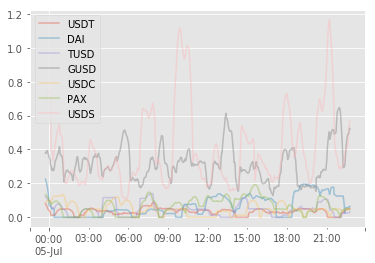

In [10]:
plt.figure(figsize=(100,50))
df_vol1.plot(alpha=0.4, style='-')
plt.legend(COIN_LIST, loc='upper left')

### 2.2 'Max - Min' Pair

In [11]:
df_vol2 = pd.DataFrame()

In [12]:
for coin in COIN_LIST:
    col_name = coin + '_vol'
    crt_time = df.index[0]
    for time in df.index[60:]:
        ind_start = time - timedelta(hours=1)
        ind_end = time
        df_vol2.loc[ind_end, col_name] = df[coin][ind_start:ind_end].max()-df[coin][ind_start:ind_end].min()

<Figure size 7200x3600 with 0 Axes>

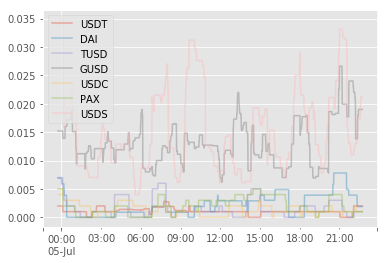

In [13]:
plt.figure(figsize=(100,50))
df_vol2.plot(alpha=0.4, style='-')
plt.legend(COIN_LIST, loc='upper left')

### 2.3 GARCH Model and vol clustering

In [26]:
!pip install arch --no-binary arch

In [28]:
from arch import arch_model
#garch1 = arch_model(df['DAI'].values, vol='Garch', p=1, o=0, q=1, dist='Normal')
#res = garch1.fit(update_freq=60)

AttributeError: type object 'arch.univariate.recursions.array' has no attribute '__reduce_cython__'

In [ ]:
cf.set_config_file(offline=False, world_readable=True, theme='henanigans')
df_vol.iplot(x='time', kind='scatter', xTitle='Date', yTitle='Price', title='Liquidity Profile of Stablecoins')